## Creating Decision Tree Model for Heart Disease Dataset

## Preprocessing

In [4]:
# Import our dependencies
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Read the Heart_Disease_Prediction.csv file from the Resources folder into a Pandas DataFrame
#file_path = Path("Heart_Disease_Prediction.csv") - use for Google Colab
file_path = "../Resources/Heart_Disease_Prediction.csv"
df_heart = pd.read_csv(file_path)

# View df
df_heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
# Convert heart disease column to binary
# Presence will be 1 and Absence will be 0
binary = {'Presence': 1, 'Absence': 0}
df_heart['Heart Disease'] = df_heart['Heart Disease'].map(binary)
df_heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
# Split our preprocessed data into our features and target arrays
target = df_heart['Heart Disease']
features = df_heart.drop('Heart Disease', axis=1)
features_name = features.columns
features.head()

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=78) 

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit the Decision Tree Model

In [8]:
# Create a random forest classifier 
DT_model = tree.DecisionTreeClassifier(random_state=78)

In [9]:
# Import the kerastuner library
DT_model = DT_model.fit(X_train_scaled, y_train)

Making Predictions using Decision Tree

In [10]:
# Making predictions using the testing data
predictions = DT_model.predict(X_test_scaled)

Decision Tree Evaluation

In [12]:
# Get best model hyperparameters
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,24,11
Actual 1,9,24


Accuracy Score : 0.7058823529411765
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        35
           1       0.69      0.73      0.71        33

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.71        68
weighted avg       0.71      0.71      0.71        68



In [14]:
# Decision Tree in sklearn automatically calculates feature importance
importances = DT_model.feature_importances_
# Sort the features by their importance
sorted(zip(DT_model.feature_importances_, features.columns), reverse=True)

[(0.2974604803258315, 'Thallium'),
 (0.14669055057450425, 'Chest pain type'),
 (0.1317065048392315, 'Number of vessels fluro'),
 (0.09115679814413785, 'Max HR'),
 (0.07475071987815617, 'Sex'),
 (0.07364610771473927, 'ST depression'),
 (0.06403516272896184, 'BP'),
 (0.05242492390168549, 'Age'),
 (0.028389891164386255, 'Cholesterol'),
 (0.024227886056971515, 'EKG results'),
 (0.015510974671394465, 'Slope of ST'),
 (0.0, 'FBS over 120'),
 (0.0, 'Exercise angina')]

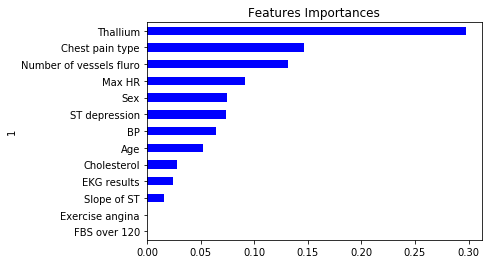

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(DT_model.feature_importances_, features.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False)